![](https://www.txlottery.org/export/sites/lottery/Images/cash_five_logo.gif)

![](https://www.txlottery.org/export/sites/lottery/Images/cash_five_prizechart_1000_x_650.png)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import seaborn as sns
from pydataset import data
import random
from collections import Counter
import requests
plt.rcParams['figure.figsize']=(13,7)

csv_url = 'https://txlottery.org/export/sites/lottery/Games/Cash_Five/Winning_Numbers/cashfive.csv'
df = pd.read_csv(csv_url)

df.head()
df.tail()

,Cash Five,10,13,1995,26,1,22,23,35
7086,Cash Five,1,20,2021,32,22,15,5,33
7087,Cash Five,1,21,2021,28,7,15,22,32
7088,Cash Five,1,22,2021,30,9,6,26,10
7089,Cash Five,1,23,2021,35,10,11,31,15
7090,Cash Five,1,25,2021,27,30,33,21,8


In [12]:
data=[]
data.insert(0,{'Cash Five':'Cash Five','10':'10','13':'13','1995':'1995','26':'26','1':'1','22':'22','23':'23','35':'35'})
df = pd.concat([pd.DataFrame(data),df],ignore_index=True)
# renaming the columns
df.columns = ['game','month','day','year','N0','N1','N2','N3','N4']


In [13]:
# converting the date to date time
df['date'] = pd.to_datetime(df[['month','day','year']])
# dropping all number sets prior to 09-24-2018 due to new game format
df = df[(df['date'] > '2018-09-23')]
df.head()

,game,month,day,year,N0,N1,N2,N3,N4,date
6359,Cash Five,9,24,2018,15,20,8,16,35,2018-09-24
6360,Cash Five,9,25,2018,27,11,24,5,6,2018-09-25
6361,Cash Five,9,26,2018,18,9,14,5,8,2018-09-26
6362,Cash Five,9,27,2018,29,9,22,23,15,2018-09-27
6363,Cash Five,9,28,2018,30,10,32,2,23,2018-09-28


# Cleaning up the DataFrame

In [14]:
# dropping columns not needed to generate numbers
lotto = df.drop(["game", "month", "day", "year", "date"], axis=1)
lotto.head()

,N0,N1,N2,N3,N4
6359,15,20,8,16,35
6360,27,11,24,5,6
6361,18,9,14,5,8
6362,29,9,22,23,15
6363,30,10,32,2,23


# Number Frequency

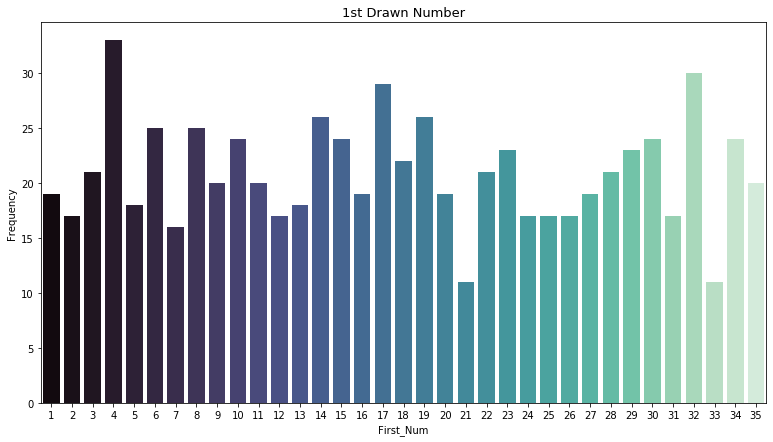

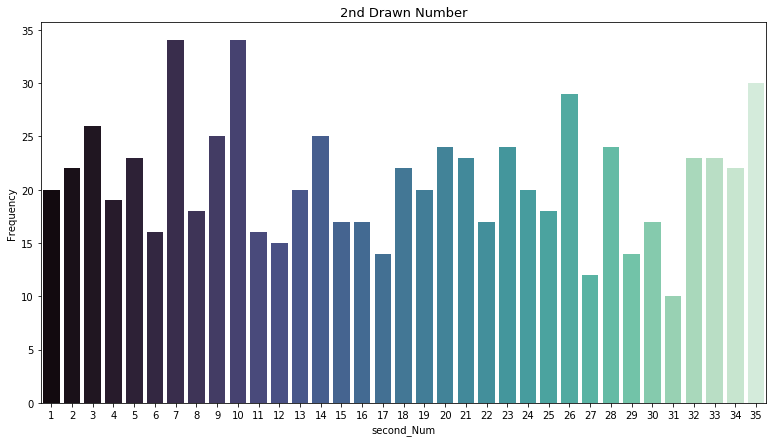

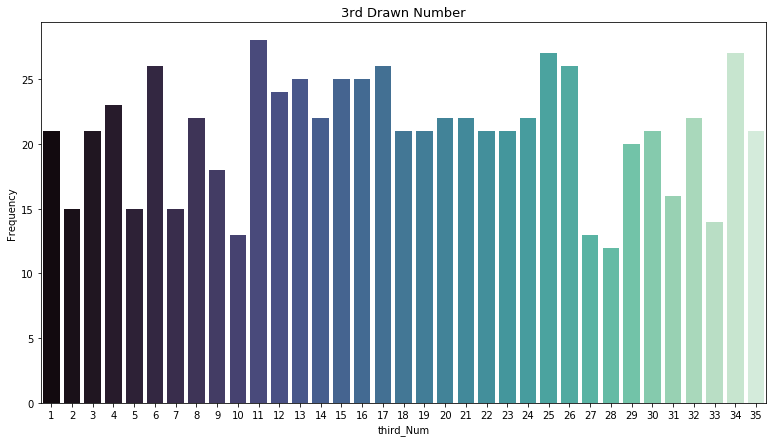

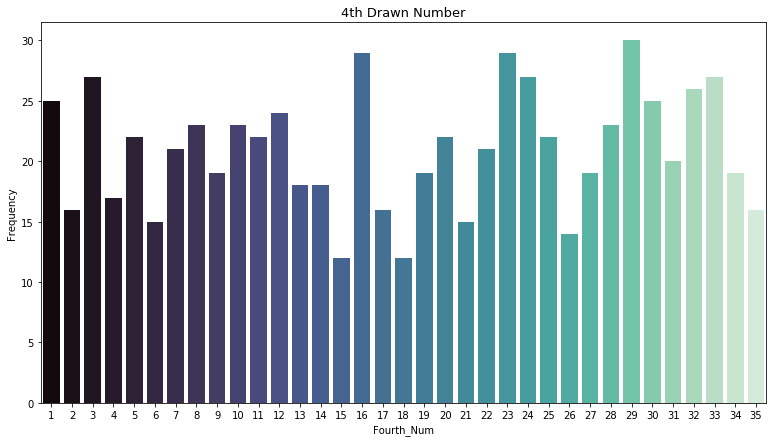

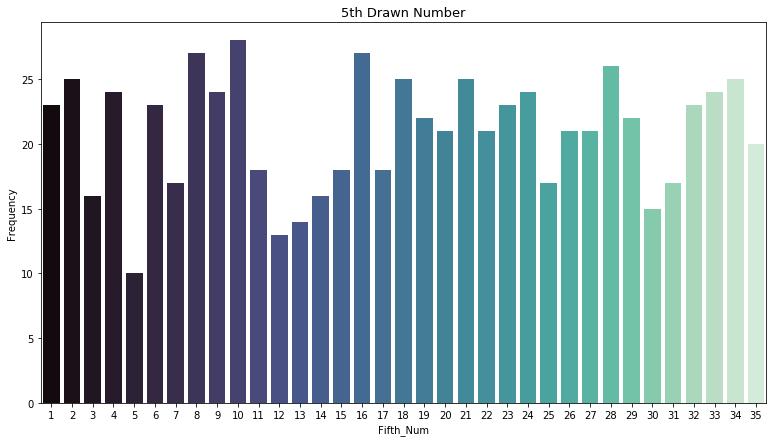

In [15]:
firsttop5 = lotto.N0.value_counts().rename_axis('First_Num').reset_index(name='Frequency')
sns.barplot(data=firsttop5, x='First_Num', y= 'Frequency', palette = 'mako')
plt.title('1st Drawn Number', fontsize=13)
plt.show()

secondtop5 = lotto.N1.value_counts().rename_axis('second_Num').reset_index(name='Frequency')
sns.barplot(data=secondtop5, x='second_Num', y= 'Frequency', palette = 'mako')
plt.title('2nd Drawn Number', fontsize=13)
plt.show()

thirdtop5 = lotto.N2.value_counts().rename_axis('third_Num').reset_index(name='Frequency')
sns.barplot(data=thirdtop5, x='third_Num', y= 'Frequency', palette = 'mako')
plt.title('3rd Drawn Number', fontsize=13)
plt.show()

fourthtop5 = lotto.N3.value_counts().rename_axis('Fourth_Num').reset_index(name='Frequency')
sns.barplot(data=fourthtop5, x='Fourth_Num', y= 'Frequency', palette = 'mako')
plt.title('4th Drawn Number', fontsize=13)
plt.show()

fifthtop5 = lotto.N4.value_counts().rename_axis('Fifth_Num').reset_index(name='Frequency')
sns.barplot(data=fifthtop5, x='Fifth_Num', y= 'Frequency', palette = 'mako')
plt.title('5th Drawn Number', fontsize=13)
plt.show()

# Cash 5 Number Generator

In [16]:
######################################################################
######################################################################
# LAMBDA FUNCTION
# First number
first_column = lotto['N0'].tolist()
print('first column count is', len(first_column))

first_num = random.choice(first_column)
print('       ',first_num)
################# Second number
second_column = lotto['N1'].tolist()
print('second column count is', len(second_column))

fixed_second = list(filter(lambda x: x != first_num, second_column))
print('fixed second column count is', len(fixed_second))

second_num = random.choice(fixed_second)
print('       ',second_num)
################# Third number
third_column = lotto['N2'].tolist()
print('third column count is', len(third_column))

third = list(filter(lambda x: x != first_num, third_column))
fixed_third = list(filter(lambda x: x != second_num, third))
print('fixed third column count is', len(fixed_third))

third_num = random.choice(fixed_third)
print('       ',third_num)
################# Fourth number
fourth_column = lotto['N3'].tolist()
print('fourth column count is', len(fourth_column))

four = list(filter(lambda x: x != first_num, fourth_column))
fourth = list(filter(lambda x: x != second_num, four))
fixed_fourth = list(filter(lambda x: x != third_num, fourth))
print('fixed fourth column count is', len(fixed_fourth))

fourth_num = random.choice(fixed_fourth)
print('       ',fourth_num)
################# Fifth number
fifth_column = lotto['N4'].tolist()
print('fifth column count is', len(fifth_column))

five = list(filter(lambda x: x != first_num, fifth_column))
fives = list(filter(lambda x: x != second_num, five))
fifth = list(filter(lambda x: x != third_num, fives))
fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
print('fixed fitfth column count is', len(fixed_fifth))

fifth_num = random.choice(fixed_fifth)
print('       ',fifth_num)

print('')
print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num)

first column count is 733
        15
second column count is 733
fixed second column count is 716
        25
third column count is 733
fixed third column count is 681
        29
fourth column count is 733
fixed fourth column count is 669
        13
fifth column count is 733
fixed fitfth column count is 662
        3

15 - 25 - 29 - 13 - 3


# All-in-One Generator Function

In [19]:
import numpy as np
import pandas as pd
import random


def cashfive_numbers():
    
    csv_url = 'https://txlottery.org/export/sites/lottery/Games/Cash_Five/Winning_Numbers/cashfive.csv'
    df = pd.read_csv(csv_url)
    
    data=[]
    data.insert(0,{'Cash Five':'Cash Five','10':'10','13':'13','1995':'1995','26':'26','1':'1','22':'22','23':'23','35':'35'})
    df = pd.concat([pd.DataFrame(data),df],ignore_index=True)
    # renaming the columns
    df.columns = ['game','month','day','year','N0','N1','N2','N3','N4']
    
    # converting the date to date time
    df['date'] = pd.to_datetime(df[['month','day','year']])
    # dropping all number sets prior to 09-24-2018 due to new game format
    df = df[(df['date'] > '2018-09-23')]
    
    # dropping columns not needed to generate numbers
    lotto = df.drop(["game", "month", "day", "year", "date"], axis=1)
    
    first_column = lotto['N0'].tolist()
    print('first column count is', len(first_column))

    first_num = random.choice(first_column)
    print('       ',first_num)
    ################# Second number
    second_column = lotto['N1'].tolist()
    print('second column count is', len(second_column))

    fixed_second = list(filter(lambda x: x != first_num, second_column))
    print('fixed second column count is', len(fixed_second))

    second_num = random.choice(fixed_second)
    print('       ',second_num)
    ################# Third number
    third_column = lotto['N2'].tolist()
    print('third column count is', len(third_column))

    third = list(filter(lambda x: x != first_num, third_column))
    fixed_third = list(filter(lambda x: x != second_num, third))
    print('fixed third column count is', len(fixed_third))

    third_num = random.choice(fixed_third)
    print('       ',third_num)
    ################# Fourth number
    fourth_column = lotto['N3'].tolist()
    print('fourth column count is', len(fourth_column))

    four = list(filter(lambda x: x != first_num, fourth_column))
    fourth = list(filter(lambda x: x != second_num, four))
    fixed_fourth = list(filter(lambda x: x != third_num, fourth))
    print('fixed fourth column count is', len(fixed_fourth))

    fourth_num = random.choice(fixed_fourth)
    print('       ',fourth_num)
    ################# Fifth number
    fifth_column = lotto['N4'].tolist()
    print('fifth column count is', len(fifth_column))

    five = list(filter(lambda x: x != first_num, fifth_column))
    fives = list(filter(lambda x: x != second_num, five))
    fifth = list(filter(lambda x: x != third_num, fives))
    fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
    print('fixed fitfth column count is', len(fixed_fifth))

    fifth_num = random.choice(fixed_fifth)
    print('       ',fifth_num)

    print('')
    print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num)
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
    
    

In [20]:
for _ in range(5):
    cashfive_numbers()

first column count is 733
        16
second column count is 733
fixed second column count is 716
        7
third column count is 733
fixed third column count is 693
        2
fourth column count is 733
fixed fourth column count is 667
        5
fifth column count is 733
fixed fitfth column count is 654
        27

16 - 7 - 2 - 5 - 27
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
first column count is 733
        12
second column count is 733
fixed second column count is 718
        20
third column count is 733
fixed third column count is 687
        5
fourth column count is 733
fixed fourth column count is 665
        10
fifth column count is 733
fixed fitfth column count is 661
        35

12 - 20 - 5 - 10 - 35
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
first column count is 733
        14
second column count is 733
fixed second column count is 708
        19
third column count is 733
fixed third colu

# Lotto Loop

- A loop to see how many times it takes to select the winning numbers

In [5]:
lotto

,N0,N1,N2,N3,N4
6359,15,20,8,16,35
6360,27,11,24,5,6
6361,18,9,14,5,8
6362,29,9,22,23,15
6363,30,10,32,2,23
...,...,...,...,...,...
7059,8,3,31,5,6
7060,19,10,8,24,20
7061,23,22,35,9,28
7062,12,23,17,28,1


In [6]:
# Getting rid of the last line as those are the numbers we are trying to match
lotto = lotto[:-1]

In [7]:
lotto

,N0,N1,N2,N3,N4
6359,15,20,8,16,35
6360,27,11,24,5,6
6361,18,9,14,5,8
6362,29,9,22,23,15
6363,30,10,32,2,23
...,...,...,...,...,...
7058,32,28,31,16,17
7059,8,3,31,5,6
7060,19,10,8,24,20
7061,23,22,35,9,28


In [8]:
def numbers():
    
    first_column = lotto['N0'].tolist()
    #print('first column count is', len(first_column))

    first_num = random.choice(first_column)
    #print('       ',first_num)
    ################# Second number
    second_column = lotto['N1'].tolist()
    #print('second column count is', len(second_column))

    fixed_second = list(filter(lambda x: x != first_num, second_column))
    #print('fixed second column count is', len(fixed_second))

    second_num = random.choice(fixed_second)
    #print('       ',second_num)
    ################# Third number
    third_column = lotto['N2'].tolist()
    #print('third column count is', len(third_column))

    third = list(filter(lambda x: x != first_num, third_column))
    fixed_third = list(filter(lambda x: x != second_num, third))
    #print('fixed third column count is', len(fixed_third))

    third_num = random.choice(fixed_third)
    #print('       ',third_num)
    ################# Fourth number
    fourth_column = lotto['N3'].tolist()
    #print('fourth column count is', len(fourth_column))

    four = list(filter(lambda x: x != first_num, fourth_column))
    fourth = list(filter(lambda x: x != second_num, four))
    fixed_fourth = list(filter(lambda x: x != third_num, fourth))
    #print('fixed fourth column count is', len(fixed_fourth))

    fourth_num = random.choice(fixed_fourth)
    #print('       ',fourth_num)
    ################# Fifth number
    fifth_column = lotto['N4'].tolist()
    #print('fifth column count is', len(fifth_column))

    five = list(filter(lambda x: x != first_num, fifth_column))
    fives = list(filter(lambda x: x != second_num, five))
    fifth = list(filter(lambda x: x != third_num, fives))
    fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
    #print('fixed fitfth column count is', len(fixed_fifth))

    fifth_num = random.choice(fixed_fifth)
    #print('       ',fifth_num)

    #print('')
    #print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num)
    return first_num, second_num, third_num, fourth_num, fifth_num

In [22]:
numbers()

(17, 2, 10, 9, 5)

In [27]:
# winning numbers
winning_numbers = 26,8,35,17,16


#first_ticket = numbers
ticket_count = 1

# Loop to keep searching for the winnings numbers from the number function
while numbers != winning_numbers:
  ticket_count += 1
  if numbers() % 100000 == 0:
    print(ticket_count, ' tickets bought and no dice...')
else:
  print('It Took', ticket_count, 'tickets to hit it big!')

TypeError: unsupported operand type(s) for %: 'tuple' and 'int'

In [9]:
numbers() = int(numbers())

SyntaxError: can't assign to function call (<ipython-input-9-357ca09e0443>, line 1)

In [29]:
type(winning_numbers)

tuple

In [9]:
get_ticket()

[{1, 17, 40, 49, 63}, 6]